In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Road Accident Predictor**

**Aim**

To predict a vehicle's likelihood of being involved in an accident.

**Info**

A road accident refers to an unfortunate event involving vehicles, pedestrians, or other road users. It is a global public health concern, leading to various consequences such as injuries, disabilities, and fatalties.
These road accidents have a profound impact, which may even result in loss of life. Besides causing physical harm, they also have a deep and lasting psychological impact on the survivors.
These road accidents occur due to various causes such as distracted driving, overspeeding, not abiding by the speed limits, fatigue, reckless or agressive driving, weather conditions, poor road conditions, vehicle defects etc.


**Dataset**

The given dataset has the following features:
* Overspeeding (Yes / No)
* Time of the day (00:01-06:00, 06:01-12:00, 12:01-6:00, 06:01-00:00)
* Weather Conditions (Clear, Foggy/Snow(unclear), Rainy)
* Whether the person driving was Drunk/Sober
* Reckless / Aggressive driving (Yes / No)
* Type of Distractions (Mobile distraction, Music distraction, Other distractions , No distraction)

The above features are used to predict:
* The probability of the vehicle being involved in accident (Outcome)

**Step 1: Data Collection**

This step involves importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Import Dataset
data_1 = pd.read_csv("Road_Accident_Dataset.csv")
data_1.shape

(599, 7)

In [4]:
data_1.head(3)

,Overspeeding,Time,Weather,Drunk / Sober,Distraction,Reckless/Aggressive,Outcome
0,Yes,12:01-18:00,Clear,Drunk,Other,No,0.70
1,Yes,00:01-06:00,Clear,Sober,No,No,0.70
2,No,00:01-06:00,Clear,Sober,Music,No,0.54


In [5]:
data_1.columns

Index(['Overspeeding', 'Time', 'Weather', 'Drunk / Sober', 'Distraction',
       'Reckless/Aggressive', 'Outcome'],
      dtype='object')

**Step 2: Data Analysis**

This step involves analysing the given dataset

In [6]:
#Taking a look at the top 10 rows of given dataset
data_1.head(10)

,Overspeeding,Time,Weather,Drunk / Sober,Distraction,Reckless/Aggressive,Outcome
0,Yes,12:01-18:00,Clear,Drunk,Other,No,0.70
1,Yes,00:01-06:00,Clear,Sober,No,No,0.70
2,No,00:01-06:00,Clear,Sober,Music,No,0.54
3,Yes,00:01-06:00,Rainy,Sober,Mobile,Yes,0.74
4,Yes,06:01-12:00,Foggy,Drunk,Other,No,0.68
5,No,18:01-00:00,Rainy,Sober,Mobile,Yes,0.55
6,Yes,00:01-06:00,Rainy,Drunk,Other,No,0.75
7,Yes,00:01-06:00,Clear,Sober,No,No,0.67
8,Yes,00:01-06:00,Rainy,Sober,Music,No,0.73
9,No,00:01-06:00,Clear,Sober,No,No,0.51


In [7]:
#Analysing the information related to the dataset
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Overspeeding         599 non-null    object 
 1   Time                 599 non-null    object 
 2   Weather              599 non-null    object 
 3   Drunk / Sober        599 non-null    object 
 4   Distraction          599 non-null    object 
 5   Reckless/Aggressive  599 non-null    object 
 6   Outcome              599 non-null    float64
dtypes: float64(1), object(6)
memory usage: 32.9+ KB


In [8]:
data_1.describe()

,Outcome
count,599.000000
mean,0.652070
std,0.118166
min,0.430000
25%,0.550000
50%,0.660000
75%,0.720000
max,0.960000


Since the given dataset is not in numeric form, we will first convert the nun numeric data into numeric form for data analysis.

For this conversion we will use One Hot Encoding

***Overspeeding***

Overspeeding is one of the major factors contributing to road accidents. Several potential dangers arise due to overspeeding such as reduced reaction time, limited control on the vehicle, compromised visibility etc.

Analysis of Overspeeding column of the dataset: 

In [9]:
#Checking the values in Overspeeding column
pd.value_counts(data_1['Overspeeding'])

C:\Users\USER\AppData\Local\Temp\ipykernel_1364\2806673619.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data_1['Overspeeding'])


Overspeeding
No     375
Yes    224
Name: count, dtype: int64

The given data can be better visualised by using plots and graphs. So we will be using the piechart to get better understanding of the Overspeeding data.

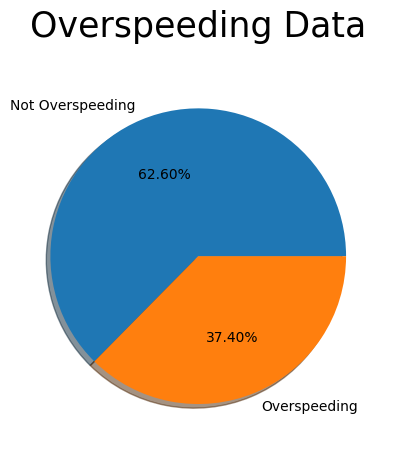

In [10]:
speed_values = [375, 224]
speed_labels = ['Not Overspeeding', 'Overspeeding']

plt.title("Overspeeding Data", pad = 25, size = 25)
speed_chart = plt.pie(speed_values, labels = speed_labels, autopct = '%0.2f%%', shadow = True)
plt.show()

From the above data, we can conclude that majority of the people are driving the vehicles within the speed limits.


***Time of the day***

Time of the day is a massive factor in determining the probability of the accident. Certain times of the day or week have higher rate of accidents. 
For example, reduced visibility at night can contribute to higher likelihood of accidents.

Analysis of Time column of the dataset: 


In [11]:
#Checking the values in Time column
pd.value_counts(data_1['Time'])

C:\Users\USER\AppData\Local\Temp\ipykernel_1364\497427216.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data_1['Time'])


Time
00:01-06:00    182
18:01-00:00    166
12:01-18:00    131
06:01-12:00    120
Name: count, dtype: int64

In [12]:
data_1.Time.describe()

count             599
unique              4
top       00:01-06:00
freq              182
Name: Time, dtype: object

Since the time column has 4 categories we can use bar graph for visualisation of this feature.

In [13]:
time_values = [182, 120, 131, 166]
time_labels = ['00:01 - 06:00', '06:01 - 12:00', '12:01 - 18:00', '18:01 - 00:00']

y_coor = np.arange(len(time_labels))
y_coor

array([0, 1, 2, 3])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<BarContainer object of 4 artists>

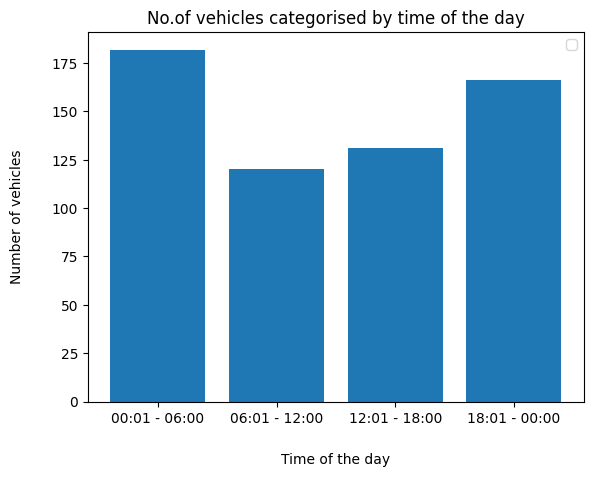

In [14]:
plt.xticks(y_coor, time_labels)
plt.xlabel('Time of the day', labelpad = 20)
plt.ylabel('Number of vehicles', labelpad = 20)
plt.title('No.of vehicles categorised by time of the day')
plt.legend()

plt.bar(y_coor, time_values)

From the above graph, we get an idea that highest number of vehicles corresponds to 00:01 - 06:00.

***Weather***

Weather is a crucial factor in determining the possibility of road accidents. Bad weather conditions corresponds to lack of visibility, reduced control over the vehicle etc. which increases the possibility of accidents. Rainy weather conditions also leads to slipping of tyres on the vehicles due to reduced friction, whic also contributes to road accidents.

Analysis of Weather column of the dataset: 

In [15]:
#Checking the values in Weather column
pd.value_counts(data_1['Weather'])

C:\Users\USER\AppData\Local\Temp\ipykernel_1364\3162970826.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data_1['Weather'])


Weather
Clear    251
Rainy    186
Foggy    162
Name: count, dtype: int64

From the value counts, we can see that the weather is divided into three categories.


In [16]:
data_1.Weather.describe()

count       599
unique        3
top       Clear
freq        251
Name: Weather, dtype: object

We will again use bar chart to visualise the given data

In [17]:
weather_values = [251, 186, 162]
weather_labels = ['Clear', 'Rainy', 'Foggy']

y_coor = np.arange(len(weather_labels))
y_coor

array([0, 1, 2])

In [18]:
Weather = data_1.groupby(['Weather']).count()
Weather = Weather['Time']
Weather = pd.DataFrame(Weather)
Weather.rename({'Time': 'Count'}, inplace=True, axis=1)
Weather

,Count
Weather,
Clear,251
Foggy,162
Rainy,186


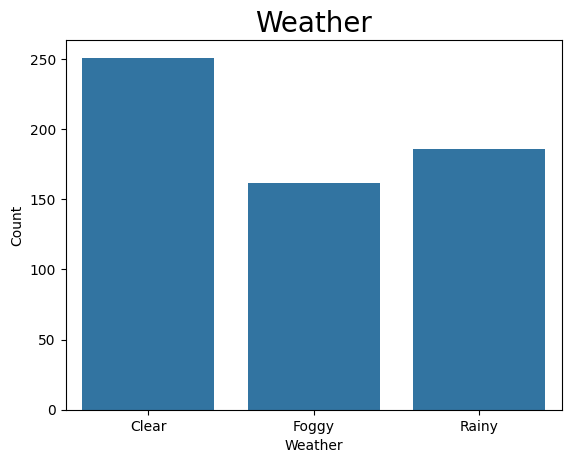

In [19]:
sns.barplot(x = Weather.index,y = Weather['Count']).set_title('Weather', size='20')
plt.show()

From the above bar graph, we can clearly distinguish the three categories in weather column and we can use this for further analysis

***Drunk / Sober***

Substance consumption impairs a person's ability to operate a vehicle safely. It leads to impaired judgment, reduced coordination, slower reaction time, distorted perception, drowsiness, decreased focus etc. which certainly increases the risk of accidents.
According to various reports published by road and highway authorities, substance consumption is only behind overspeeding leading to accidents.

Analysis of Drunk ? Sober column of dataset: 

In [20]:
#Checking the values in column
pd.value_counts(data_1['Drunk / Sober'])

C:\Users\USER\AppData\Local\Temp\ipykernel_1364\404521759.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data_1['Drunk / Sober'])


Drunk / Sober
Sober    348
Drunk    251
Name: count, dtype: int64

We can use a piechart to analyse the data.

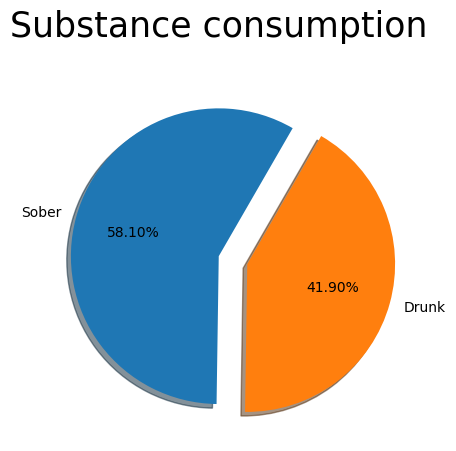

In [21]:
subs_values = [348, 251]
subs_labels = ['Sober', 'Drunk']

plt.title("Substance consumption", pad = 25, size = 25)
speed_chart = plt.pie(subs_values, labels = subs_labels, autopct = '%0.2f%%', shadow = True, explode = [0, 0.2], startangle = 60)
plt.show()

As we can see from the above pie chart, 41.90% of drivers are under the influence of liquor, which certainly is a very high number.
Hence, we can conclude that the dataset has a highly uneven proportioin of number of drunk drivers.

***Distractions***

Distractions can lead to accidents by diverting the drivers attention away from the road and critical driving tasks.
The driver can be distracted due to various reasons such as mobiles, listening to loud music while driving, involving in a conversation and many more.

Analysis of Distractions column in dataset: 

In [22]:
#Checking the values in Distractions column
pd.value_counts(data_1['Distraction'])

C:\Users\USER\AppData\Local\Temp\ipykernel_1364\1115817289.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data_1['Distraction'])


Distraction
No        212
Mobile    143
Other     125
Music     119
Name: count, dtype: int64

As we can see from the given data, most of the people are not distracted while driving
We will use bargraph and piechart to get better understanding of the given data

In [23]:
Distraction = data_1.groupby(['Distraction']).count()
Distraction = Distraction['Time']
Distraction = pd.DataFrame(Distraction)
Distraction.rename({'Time': 'Count'}, inplace=True, axis=1)
Distraction

,Count
Distraction,
Mobile,143
Music,119
No,212
Other,125


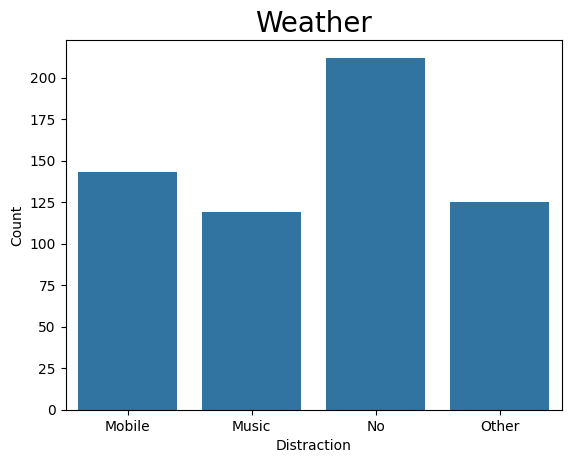

In [24]:
sns.barplot(x = Distraction.index,y = Distraction['Count']).set_title('Weather', size='20')
plt.show()

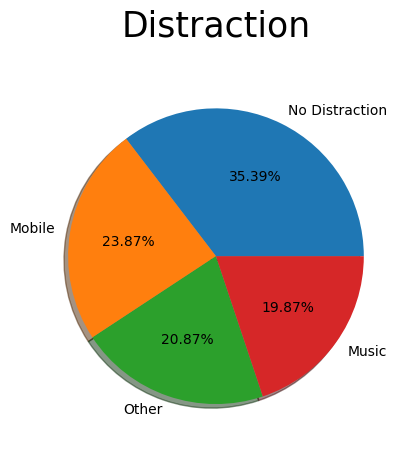

In [25]:
dist_values = [212, 143, 125, 119]
dist_labels = ['No Distraction', 'Mobile', 'Other', 'Music']

plt.title("Distraction", pad = 25, size = 25)
speed_chart = plt.pie(dist_values, labels = dist_labels, autopct = '%0.2f%%', shadow = True)
plt.show()

The above graphs hels us to get better understand of the given dataset.

***Reckless/Aggressive Driving***

Reckless driving significantly increases the risk of road accidents due to a combination of dangerous behaviours and disregard for traffic laws. 
Excessive speeding, constant changing of lanes, failure to obey traffic signals, constant overtaking, tailgating etc. contribute to risk of accident.

Analysing Reckless/Aggressive Driving column of the dataset: 

In [26]:
#Taking a look at the values in Reckless driving column
pd.value_counts(data_1['Reckless/Aggressive'])

C:\Users\USER\AppData\Local\Temp\ipykernel_1364\1330390881.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data_1['Reckless/Aggressive'])


Reckless/Aggressive
No     338
Yes    261
Name: count, dtype: int64

Plotting pie chart for the above data: 

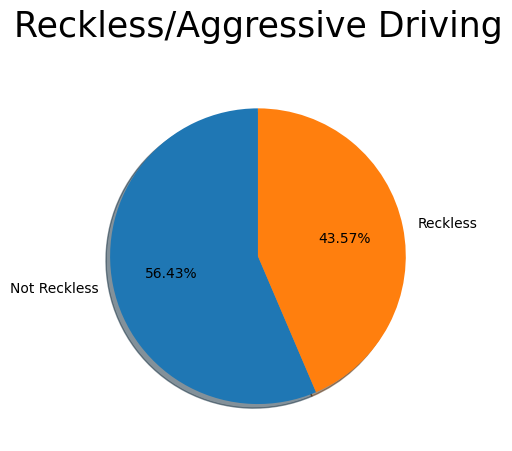

In [27]:
rec_values = [338, 261]
rec_labels = ['Not Reckless', 'Reckless']

plt.title("Reckless/Aggressive Driving", pad = 25, size = 25)
speed_chart = plt.pie(rec_values, labels = rec_labels, autopct = '%0.2f%%', shadow = True, startangle = 90)
plt.show()

***Outcome***

The outcome gives the likelihood of a car being involved in an accident. The range of the values is 0 to 1.

In [28]:
#Analysis of outcome column
data_1.Outcome.describe()

count    599.000000
mean       0.652070
std        0.118166
min        0.430000
25%        0.550000
50%        0.660000
75%        0.720000
max        0.960000
Name: Outcome, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_1364\1211248477.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Outcome']).set_title('Probability Distribution of Vehicle Being Involved in Accident', size='20')


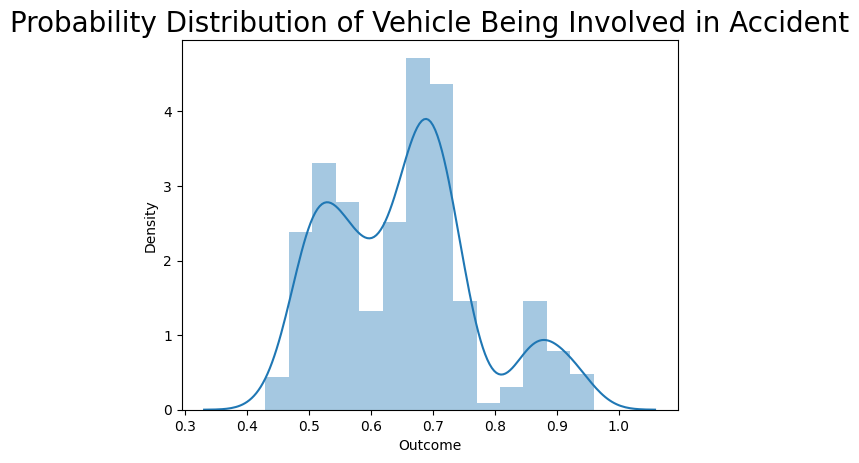

In [29]:
data_1['Outcome']
sns.distplot(data_1['Outcome']).set_title('Probability Distribution of Vehicle Being Involved in Accident', size='20')
plt.show()

This concludes the data analysis part of this dataset. This part included taking a look at the values present in the dataset and understanding pictorial representation of 

**Step 3: Converting Text to Numeric Data**
The data present in this dataset is in the form of text. But machine learning models are not compatible with text data. Hence, we are required to convert the given data present in the dataset, in numeric form.

There are various approaches which can be used to convert text into numbers. Some of them are:
* Label Encoding
* One-Hot Encoding
* Mapping

For the given dataset, we will be using Mapping technique. Mapping refers to the process of applying a function or transformation to each element in a Series or DataFrame. It allows us to change values based on specified conditions or create new columns based on existing data, enhancing data manipulation and analysis capabilities in python.

In [30]:
data_num = data_1

In [31]:
data_num[:2]

,Overspeeding,Time,Weather,Drunk / Sober,Distraction,Reckless/Aggressive,Outcome
0,Yes,12:01-18:00,Clear,Drunk,Other,No,0.7
1,Yes,00:01-06:00,Clear,Sober,No,No,0.7


In [32]:
target1 = {'Yes' : 1, 'No' : 0}
target2 = {'00:01-06:00' : 1, '06:01-12:00' : 2, '12:01-18:00' : 3, '18:01-00:00' : 4}
target3 = {'Clear' : 1, 'Rainy' : 2, 'Foggy' : 3}
target4 = {'Drunk' : 1, 'Sober' : 0}
target5 = {'Mobile' : 1, 'Music' : 2, 'No' : 3, 'Other' : 4}
target6 = {'Yes' : 1, 'No' : 0}

In [33]:
data_num['Speed_num'] = data_num.Overspeeding.map(target1)
data_num['Time_num'] = data_num.Time.map(target2)
data_num['Weather_num'] = data_num.Weather.map(target3)
data_num['Drunk_num'] = data_num['Drunk / Sober'].map(target4)
data_num['Distraction_num'] = data_num.Distraction.map(target5)
data_num['Reckless_num'] = data_num['Reckless/Aggressive'].map(target6)

In [34]:
data_num.head()

,Overspeeding,Time,Weather,Drunk / Sober,Distraction,Reckless/Aggressive,Outcome,Speed_num,Time_num,Weather_num,Drunk_num,Distraction_num,Reckless_num
0,Yes,12:01-18:00,Clear,Drunk,Other,No,0.70,1,3,1,1,4,0
1,Yes,00:01-06:00,Clear,Sober,No,No,0.70,1,1,1,0,3,0
2,No,00:01-06:00,Clear,Sober,Music,No,0.54,0,1,1,0,2,0
3,Yes,00:01-06:00,Rainy,Sober,Mobile,Yes,0.74,1,1,2,0,1,1
4,Yes,06:01-12:00,Foggy,Drunk,Other,No,0.68,1,2,3,1,4,0


In [35]:
data_num1 = data_num[['Speed_num', 'Weather_num', 'Time_num', 'Drunk_num', 'Distraction_num', 'Reckless_num', 'Outcome']]
data_2 = pd.DataFrame(data_num1)

In [36]:
data_2.head()

,Speed_num,Weather_num,Time_num,Drunk_num,Distraction_num,Reckless_num,Outcome
0,1,1,3,1,4,0,0.70
1,1,1,1,0,3,0,0.70
2,0,1,1,0,2,0,0.54
3,1,2,1,0,1,1,0.74
4,1,3,2,1,4,0,0.68


So, we have created a new dataframe consisting of all the numeric data. The mapped values have been selected as integers which do not hve large variation, else it may cause scaling issue. But since we have chose values ranging from 0 to 4, we will not face an issue regarding the scaling.

**Step 4: Creating a Machine Learning model**

First, we will select the training features and test features.

In [37]:
X = data_2.drop(columns = ['Outcome'])
Y = data_2.Outcome


To understand the efficiency of the model, we will split the data into training and test data.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

Since we are predicting a continous numeric value, we will use regression algorithms.

**1. Linear Regression**

In [40]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()

In [41]:
model_1.fit(X_train, y_train)

LinearRegression()

To test the efficiency of this model, we can use the 'score' method which will give us the efficiency of this algorithm between 0 and 1.

In [42]:
score_1 = model_1.score(X_test, y_test)
model_1.score(X_test, y_test)

0.8843408499573329

In [43]:
y_pred = model_1.predict(X_test)

In [44]:
from sklearn.metrics import r2_score, mean_squared_error
lr_r2 = r2_score(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1}, \nLinear Regression RMSE:{2}'.format(lr_r2, lr_mse, lr_rmse))

Linear Regression R2 Score: 0.8843408499573329 
Linear Regression MSE: 0.0014765000687997805, 
Linear Regression RMSE:0.038425253008923445


C:\Users\USER\AppData\Local\Temp\ipykernel_1364\971232948.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred))


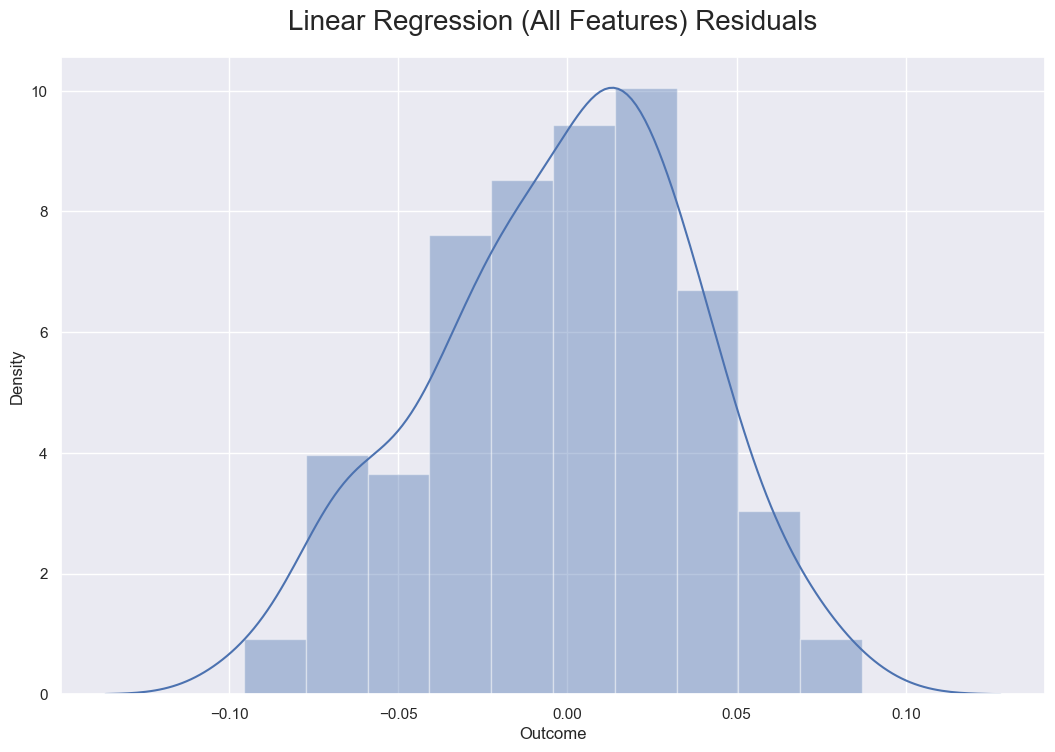

In [45]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
sns.distplot((y_test - y_pred))
plt.title('Linear Regression (All Features) Residuals', fontdict={'fontsize':20}, pad=20)
plt.show()

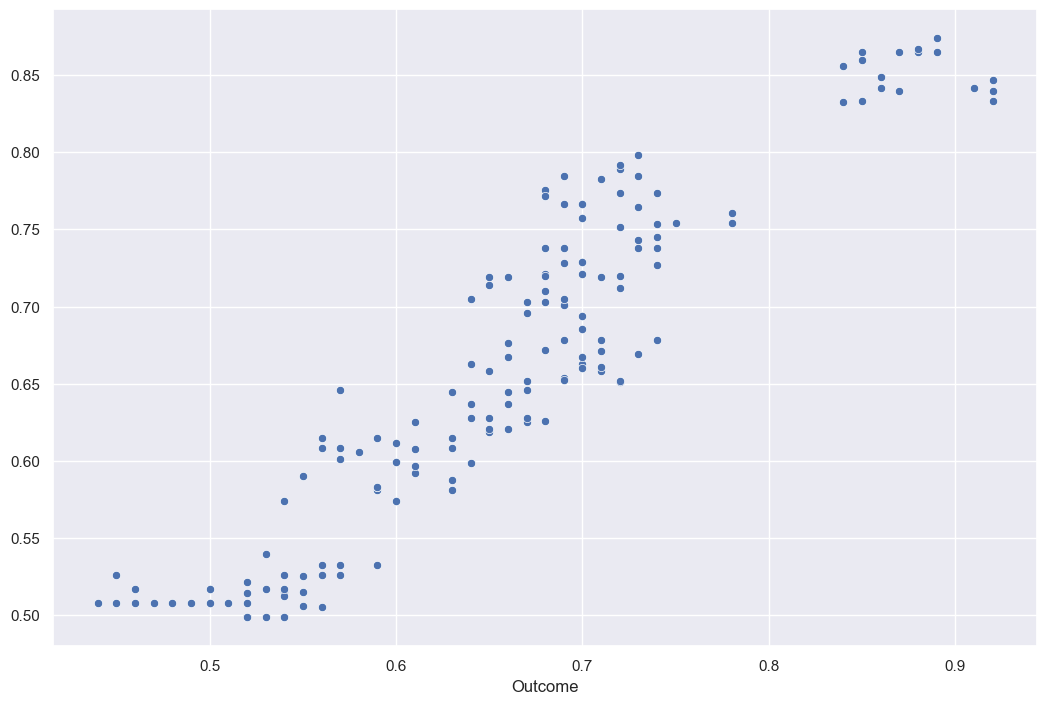

In [46]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
# sns.(y_test, y_pred)
sns.scatterplot(x = y_test,y = y_pred)
plt.show()

**2. Decision Trees**

In [47]:
from sklearn.tree import DecisionTreeRegressor

model_2 = DecisionTreeRegressor()

In [48]:
model_2.fit(X_train, y_train)

DecisionTreeRegressor()

In [49]:
score_2 = model_2.score(X_test, y_test)
model_2.score(X_test, y_test)

0.9596083599114336

In [50]:
y_pred_2 = model_2.predict(X_test)

In [51]:
model_2_r2 = r2_score(y_test, y_pred_2)
model_2_mse = mean_squared_error(y_test, y_pred_2)
model_2_rmse = np.sqrt(model_2_mse)
print('Decision Tree R2 Score: {0} \nDecision Tree MSE: {1}, \nDecision Tree RMSE:{2}'.format(model_2_r2, model_2_mse, model_2_rmse))

Decision Tree R2 Score: 0.9596083599114336 
Decision Tree MSE: 0.0005156380567184134, 
Decision Tree RMSE:0.022707665153388477


**3. Random Forest**

In [52]:
from sklearn.ensemble import RandomForestRegressor

model_3 = RandomForestRegressor()

In [53]:
model_3.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
score_3 = model_3.score(X_test, y_test)
model_3.score(X_test, y_test)

0.9725771470393084

In [55]:
y_pred_3 = model_3.predict(X_test)

In [56]:
model_3_r2 = r2_score(y_test, y_pred_3)
model_3_mse = mean_squared_error(y_test, y_pred_3)
model_3_rmse = np.sqrt(model_3_mse)
print("Random Forest R2 score: ", model_3_r2)
print("Random Forest MSE: ", model_3_mse)
print("Random Forest RMSE: ", model_3_rmse)

Random Forest R2 score:  0.9725771470393084
Random Forest MSE:  0.00035007904059653253
Random Forest RMSE:  0.018710399263418526


**4. K-Nearest Neighbors**

In [57]:
from sklearn.neighbors import KNeighborsRegressor

model_4 = KNeighborsRegressor(n_neighbors = 3)

In [58]:
model_4.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [59]:
model_4.score(X_test, y_test)

0.8382852159642337

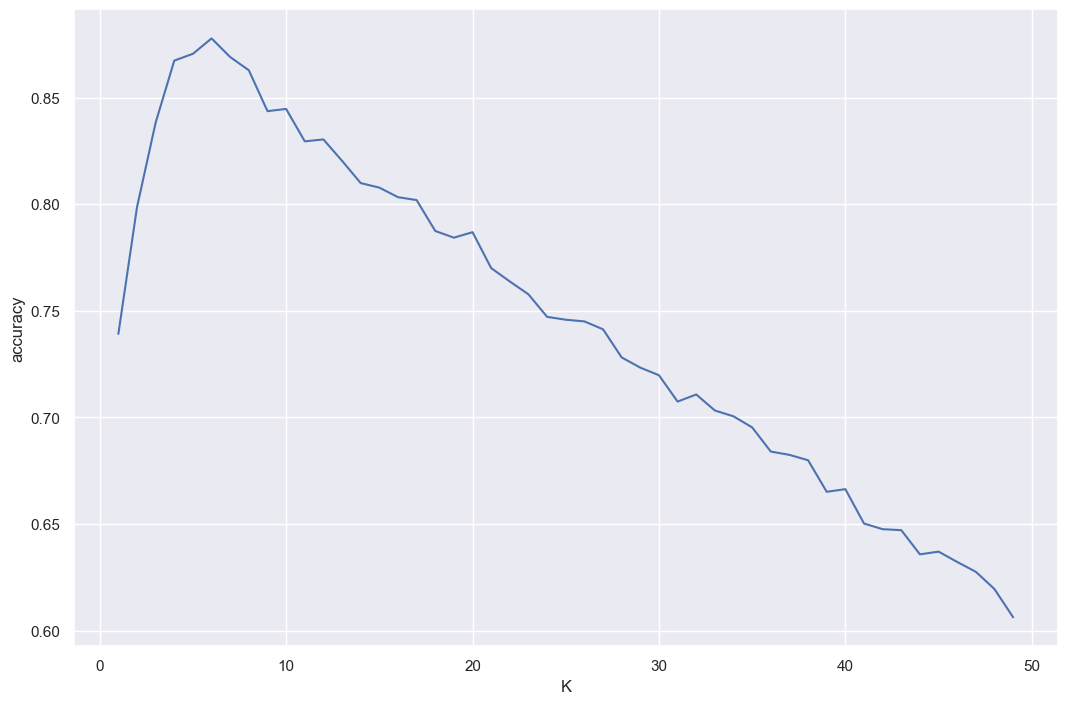

In [60]:
# finding k value
scores = []
for each in range(1,50):
    knn_n = KNeighborsRegressor(n_neighbors = each)
    knn_n.fit(X_train, y_train)
    scores.append(knn_n.score(X_test, y_test))
    
plt.plot(range(1,50),scores)
plt.xlabel("K")
plt.ylabel("accuracy")
plt.show()

In [61]:
model_4_2 = KNeighborsRegressor(n_neighbors = 5)

In [62]:
model_4_2.fit(X_train, y_train)

KNeighborsRegressor()

In [63]:
score_4 = model_4_2.score(X_test, y_test)
model_4_2.score(X_test, y_test)

0.8705550616741909

In [64]:
y_pred_4 = model_4_2.predict(X_test)

In [65]:
model_4_r2 = r2_score(y_test, y_pred_4)
model_4_mse = mean_squared_error(y_test, y_pred_4)
model_4_rmse = np.sqrt(model_4_mse)
print("KNN R2 score: ", model_4_r2)
print("KNN MSE: ", model_4_mse)
print("KNN RMSE: ", model_4_rmse)

KNN R2 score:  0.8705550616741909
KNN MSE:  0.001652488888888889
KNN RMSE:  0.040650816583297424


**5. Support Vector Machine**

In [66]:
from sklearn.svm import SVR

model_5 = SVR()

In [67]:
model_5.fit(X_train, y_train)

SVR()

In [68]:
score_5 = model_5.score(X_test, y_test)
model_5.score(X_test, y_test)

0.7800342670047565

In [69]:
y_pred_5 = model_5.predict(X_test)

In [70]:
model_5_r2 = r2_score(y_test, y_pred_5)
model_5_mse = mean_squared_error(y_test, y_pred_5)
model_5_rmse = np.sqrt(model_5_mse)
print("SVM R2 score: ", model_5_r2)
print("SVM MSE: ", model_5_mse)
print("SVM RMSE: ", model_5_rmse)

SVM R2 score:  0.7800342670047565
SVM MSE:  0.002808073721631695
SVM RMSE:  0.052991260804322204


**6. Gradient Boosting**

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

model_6 = GradientBoostingRegressor()

In [72]:
model_6.fit(X_train, y_train)

GradientBoostingRegressor()

In [73]:
score_6 = model_6.score(X_test, y_test)
model_6.score(X_test, y_test)

0.972127991368014

In [74]:
y_pred_6 = model_6.predict(X_test)

In [75]:
model_6_r2 = r2_score(y_test, y_pred_6)
model_6_mse = mean_squared_error(y_test, y_pred_6)
model_6_rmse = np.sqrt(model_6_mse)
print("GBR R2 score: ", model_6_r2)
print("GBR MSE: ", model_6_mse)
print("GBR RMSE: ", model_6_rmse)

GBR R2 score:  0.972127991368014
GBR MSE:  0.0003558129438745999
GBR RMSE:  0.018863004635386163


Text(0, 0.5, 'Score (0 to 1)')

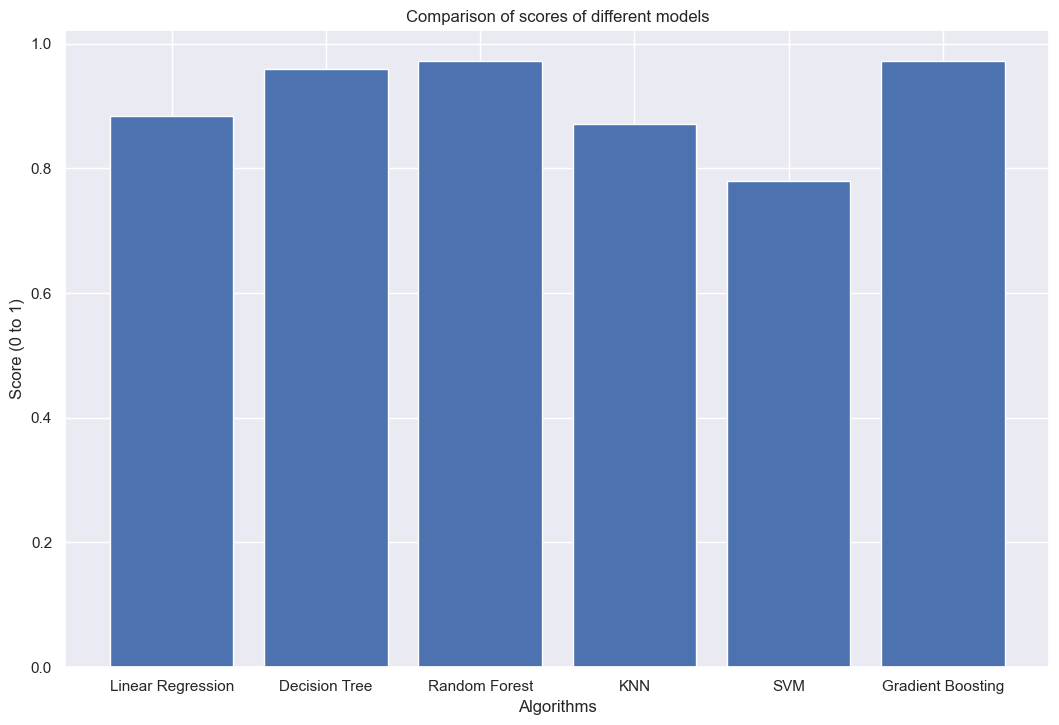

In [76]:
y = np.array([score_1, score_2, score_3, score_4, score_5, score_6])
x = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Gradient Boosting']

plt.bar(x, y)
plt.title('Comparison of scores of different models')
plt.xlabel("Algorithms")
plt.ylabel("Score (0 to 1)")

**Step 5: Conclusion Analysis**

From the above analysis of all the algorithms, we can conclude that Random Forest performs just better than Gradient Boosting and gives the highest efficiency and performs the best on the given dataset.

Since the values in the features were not continous numeric data, but consisted of categories, the Random Forest and Decision Tree algorithms performed better than all the other algorithms.

Support Vector performed worst out of the five models, as it is mostly used for classification tasks, where the goal is to seperate data into distinct categories or classes.

Hence, we can conclude that Random forest and Gradient Boosting perform best on the given dataset and give an efficiency of about 97.2%(approx.).

In [77]:
model_1.predict([[1, 1, 3, 1, 4, 0]])

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.75761586])

In [78]:
import pickle
pickle_out_1 = open("model_1.pkl", "wb")
pickle.dump(model_1, pickle_out_1)
pickle_out_1.close()

In [79]:
pickle_out_2 = open("model_2.pkl", "wb")
pickle.dump(model_2, pickle_out_2)
pickle_out_2.close()

In [80]:
pickle_out_3 = open("model_3.pkl", "wb")
pickle.dump(model_3, pickle_out_3)
pickle_out_3.close()

In [81]:
pickle_out_4 = open("model_4.pkl", "wb")
pickle.dump(model_4, pickle_out_4)
pickle_out_4.close()

In [82]:
pickle_out_5 = open("model_5.pkl", "wb")
pickle.dump(model_5, pickle_out_5)
pickle_out_5.close()

In [83]:
pickle_out_6 = open("model_6.pkl", "wb")
pickle.dump(model_6, pickle_out_6)
pickle_out_6.close()